In [ ]:
!pip install tensorflow.gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 5.8 kB/s 
     |████████████████████████████████| 1.6 MB 66.7 MB/s 
     |████████████████████████████████| 5.8 MB 53.0 MB/s 
     |████████████████████████████████| 438 kB 63.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [ ]:
import tensorflow as tf
from tensorflow  import keras
print(tf.__version__)
print(keras.__version__)

2.8.2
2.8.0


In [ ]:
## import some basics libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Divide the dataset into independent and dependent features
X = dataset.iloc[:,3:13]  #iloc function helps us to select a specific row or column from the data set.
y = dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
## feature engineering 
geography =pd.get_dummies(X['Geography'], drop_first =True)
gender = pd.get_dummies(X['Gender'],drop_first =True)

In [ ]:
## concatenate these variables  with dataframe
X =X.drop(['Geography','Gender'],axis =1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X =pd.concat([X,geography,gender],axis =1)

In [ ]:
#Splitting the datset into Traininng set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state =0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
## part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# Lets intialize the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer
classifier.add(Dense(units =11,activation ='relu'))

In [ ]:
## adding the first hidden layer
classifier.add(Dense(units =7,activation ='relu'))
classifier.add(Dropout(0.2))

In [ ]:
## Adding the second hiddden layer
classifier.add(Dense(units =6,activation ='relu'))
classifier.add(Dropout(0.3))

In [ ]:
## adding the output layer 
classifier.add(Dense(1,activation = 'sigmoid'))


In [ ]:
classifier.compile(optimizer = opt,loss ='binary_crossentropy',metrics =['accuracy'])

In [ ]:
import tensorflow 
opt = tensorflow.optimizers.Adam(learning_rate=0.01)

In [ ]:
## Early Stopping
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
model_history =classifier.fit(X_train,y_train,validation_split =0.33,batch_size =10,epochs =1000,callbacks= early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.5118 - accuracy: 0.7949 - val_loss: 0.5066 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.5066 - accuracy: 0.7962 - val_loss: 0.5066 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.5063 - accuracy: 0.7962 - val_loss: 0.5066 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.5057 - accuracy: 0.7962 - val_loss: 0.5071 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.5061 - accuracy: 0.7962 - val_loss: 0.5065 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.5062 - accuracy: 0.7962 - val_loss: 0.5067 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.5060 - accuracy: 0.7962 - val_loss: 0.5067 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

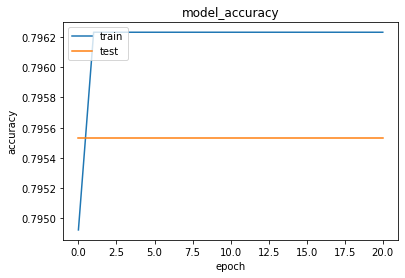

In [ ]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc ='upper left')
plt.show()

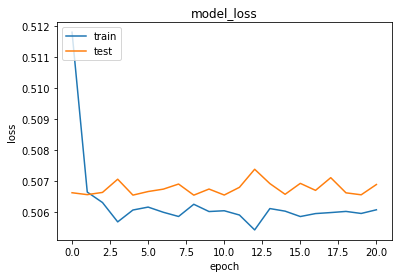

In [ ]:
#summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc ='upper left')
plt.show()

In [ ]:
# Part 3 - Making the predictions and evaluating the model
#Predictions the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [ ]:
## making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm


array([[1595,    0],
       [ 405,    0]])

In [ ]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)


In [ ]:
score

0.7975

In [ ]:
## get the weights
classifier.get_weights()

[array([[ 0.08341525,  0.2851176 ,  0.07391433, -0.17811495, -0.34691316,
         -0.03893194,  0.10130394,  0.20418715, -0.18224895, -0.23411211,
          0.42863452],
        [-0.4840676 ,  0.5679702 , -0.49482617, -0.54094756, -0.55652875,
         -0.10593164, -0.45909014, -0.5646681 ,  0.28097224,  0.09922725,
          0.39913005],
        [-0.20076972,  0.8827782 , -0.7294297 , -0.06186171,  0.09824218,
         -0.45798066, -0.3468308 ,  0.01480541,  0.14533508,  0.27013785,
         -0.33843055],
        [ 0.3384314 ,  0.55413306, -0.3283972 , -0.4597286 , -0.25237587,
         -0.18677053, -0.36221415, -0.12196042, -0.32758117, -0.48777068,
         -0.00222044],
        [ 0.20315395,  0.5466694 , -0.16113389, -0.254516  , -0.39102465,
         -0.1504415 ,  0.26472193,  0.239993  ,  0.24880034,  0.35137308,
          0.24624181],
        [-0.5320984 ,  1.1407996 , -0.56595695,  0.21030048, -1.1475643 ,
         -0.11477235,  0.28983888, -0.5534213 , -0.09810966, -0.0481373